In [117]:
from os import path
from pandas import read_csv
import matplotlib.pylab as plt
import seaborn
import re
import numpy as np
from datetime import datetime

The production data is in xls format, open it an export as csv for convenience.

In [8]:
daily_production = path.expanduser(
    '~/Documents/Hackathon/AgileSprint2018/VolveProductionData/Daily Production Data-Table 1.csv')
montly_production = path.expanduser(
    '~/Documents/Hackathon/AgileSprint2018/VolveProductionData/Monthly Production Data-Table 1.csv')

In [43]:
daily = read_csv(daily_production) # silly europeans!
daily[:5]

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000,...,%,0.000,0.00,0.000,0,0,0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.376,...,%,33.098,10.48,33.072,0,0,0,NaN,production,OP


In [120]:
daily.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [89]:
# account for silly European numbers!
monthly = read_csv(montly_production,  thousands=',', quotechar='"', header=[0,1])

In [125]:
len(monthly.columns)

10

In [116]:
monthly[:2]

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,hrs,Sm3,Sm3,Sm3,Sm3,Sm3
0,15/9-F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,15/9-F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN


/Users/blasscock/.edm/envs/hackathon2018/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/blasscock/.edm/envs/hackathon2018/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


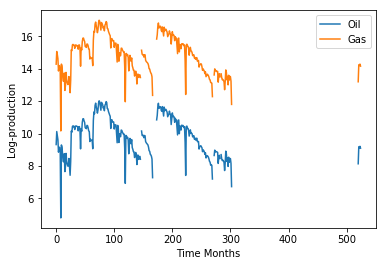

In [119]:
plt.figure()
plt.plot(np.log(monthly['Oil']['Sm3']))
plt.plot(np.log(monthly['Gas']['Sm3']))
plt.legend(['Oil', 'Gas'])
plt.xlabel('Time Months')
plt.ylabel('Log-production')
plt.show()